This notebook aims to compare different Land Feature datasets and pick a default one.

In [1]:
import cartopy
import contextily as cx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

In [2]:
from matplotlib import rcParams

font_size = 15
rcParams['axes.titlesize'] = font_size
rcParams['axes.labelsize'] = font_size - 2
rcParams['xtick.labelsize'] = font_size - 2
rcParams['ytick.labelsize'] = font_size - 2
rcParams['legend.fontsize'] = font_size
rcParams['figure.titlesize'] = font_size
rcParams['figure.titleweight'] = 'bold'

In [3]:
def plot_data(axs):
    ax = axs[1]
    coast = cfeature.GSHHSFeature(scale='full')
    ax.add_feature(coast, facecolor="lightgray")
    ax.set_title('GSHHS')

    ax = axs[2]
    ax.add_feature(cartopy.feature.NaturalEarthFeature("physical", "land", "10m"),
                ec="red", fc="yellow", lw=2, alpha=0.4)
    ax.set_title('Natural Earth')

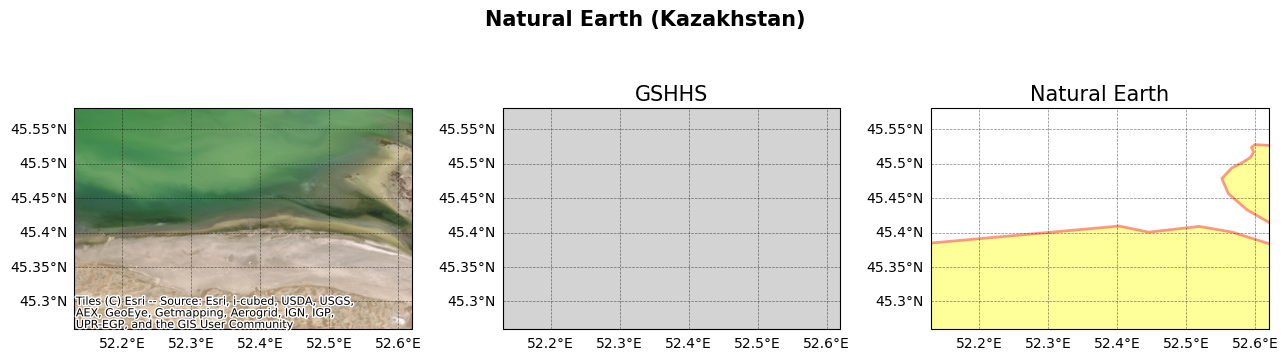

In [4]:
fig, axs = plt.subplots(ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        sharex=True,
                        sharey=True,
                        figsize=(13, 4)
                        )

axs = axs.flatten()
plot_data(axs)

coordinates = (52.13, 52.62, 45.26, 45.58)

for ax in axs:
    ax.set_xlim(coordinates[0], coordinates[1])
    ax.set_ylim(coordinates[2], coordinates[3])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

cx.add_basemap(axs[0], crs=ccrs.PlateCarree(), source=cx.providers.Esri.WorldImagery)

plt.suptitle('Natural Earth (Kazakhstan)')
fig.tight_layout()

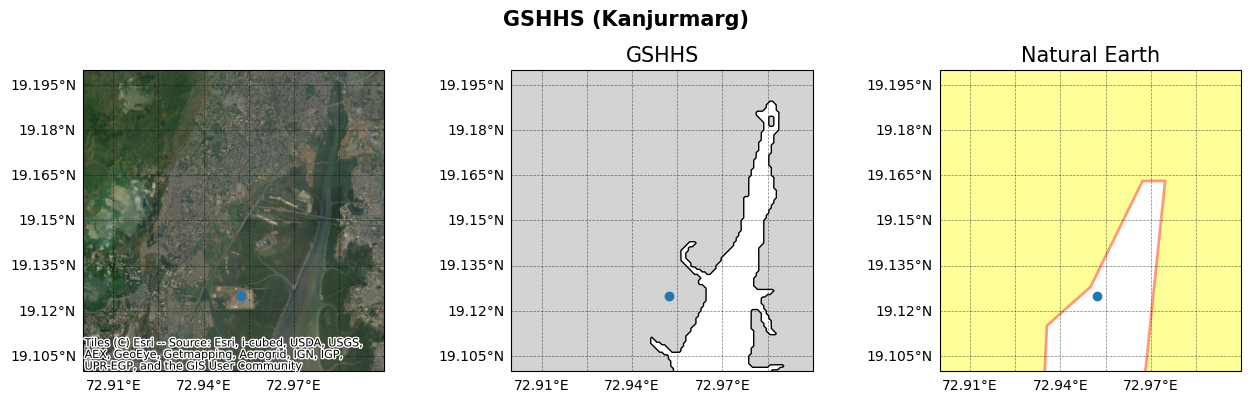

In [5]:
fig, axs = plt.subplots(ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        sharex=True,
                        sharey=True,
                        figsize=(13, 4)
                        )

axs = axs.flatten()
plot_data(axs)

coordinates = (72.9, 73, 19.1, 19.2)

for ax in axs:
    ax.set_xlim(coordinates[0], coordinates[1])
    ax.set_ylim(coordinates[2], coordinates[3])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

cx.add_basemap(axs[0], crs=ccrs.PlateCarree(), source=cx.providers.Esri.WorldImagery)
# landfill location
for ax in axs:
    ax.scatter(72.9523, 19.1249, zorder=100)

plt.suptitle('GSHHS (Kanjurmarg)')
fig.tight_layout()

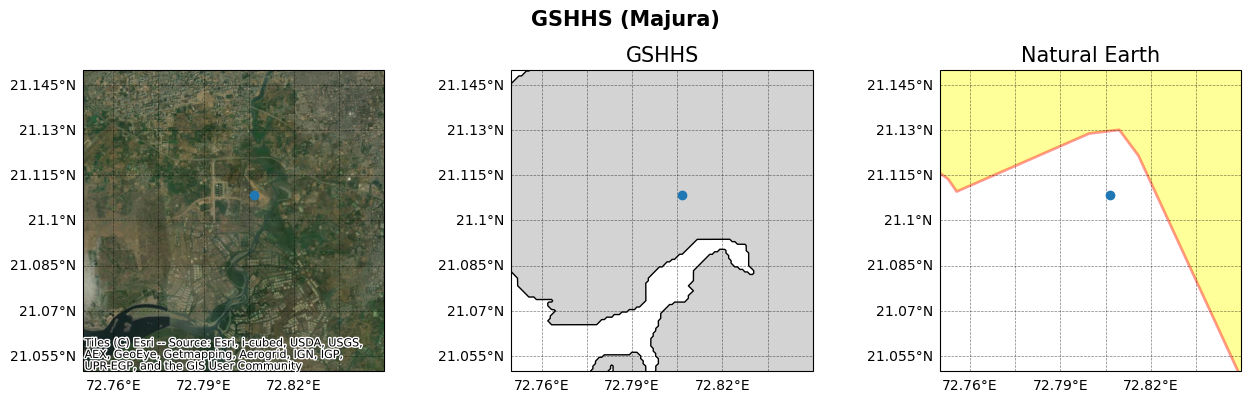

In [6]:
fig, axs = plt.subplots(ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        sharex=True,
                        sharey=True,
                        figsize=(13, 4)
                        )

axs = axs.flatten()
plot_data(axs)

coordinates = (72.75, 72.85, 21.05, 21.15)

for ax in axs:
    ax.set_xlim(coordinates[0], coordinates[1])
    ax.set_ylim(coordinates[2], coordinates[3])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

cx.add_basemap(axs[0], crs=ccrs.PlateCarree(), source=cx.providers.Esri.WorldImagery)

# landfill location
for ax in axs:
    ax.scatter(72.806592,  21.108383, zorder=100)

plt.suptitle('GSHHS (Majura)')
fig.tight_layout()

We finally choose GSHHS as the default one because of its higher resolution and accuracy.